In [1]:
#Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [3]:
#Importing Data

df = pd.read_csv(r"C:\Users\ranji\Downloads\Submitted tasks\Sourcing Open Data_7/boat_data.csv")

In [4]:
#I will embark on data cleaning before progressing to the subsequent task steps.
# Data Wrangling


shape=df.shape
print('Rows : ',shape[0])
print('Columns : ',shape[1])


Rows :  9888
Columns :  10


In [5]:
# Display random sample of 5 rows from data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [7]:
#Structuring
#Split Price to 'currency','Price'

df[['currency','Price']]= df['Price'].str.split(' ', 1, expand=True)
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR


In [8]:
#checking currencies

df['currency'].value_counts()

EUR    8430
CHF     980
Â£      298
DKK     180
Name: currency, dtype: int64

In [9]:
#Converting prices from various currencies to EUR (Euro)

def eurprice(Price,currency):
    if currency=='EUR':
        return Price
    elif currency=='CHF':
        return int(Price) * 1.02
    elif currency=='DKK':
        return int(Price) * 0.13
    elif currency=='Â£':
        return int(Price) * 1.17
df['EUR_price'] = df.apply(lambda x: eurprice(x.Price, x.currency), axis=1)

In [10]:
#Spliting Location to 'Country','City','Other'

df[['Country','City']]= df['Location'].str.split('Â»', 1, expand=True)
df[['City','Other']]= df['City'].str.split('Â»', 1, expand=True)
df['City']=df['City'].str.replace('¶','',regex=True)
df['City']=df['City'].str.replace('Ã','',regex=True)

In [11]:
df_Structuring = df.drop(['Location','currency','Price','Other'],axis=1)
df_Structuring.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,3403.74,Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,3845.4,Switzerland,Lake of Zurich
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,3367.0,Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern


In [12]:
#Cleaning
#check for missing values (NaN)

df_Structuring.isna().sum()

Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Number of views last 7 days       0
EUR_price                         0
Country                          36
City                            943
dtype: int64

In [13]:
# spliting the columns 'Boat Type' and 'Boat Type1'

df_Structuring[['Boat Type','Boat Type1']]=df_Structuring['Boat Type'].str.split(',', 1, expand=True)
df_Structuring = df_Structuring.drop(['Boat Type1'],axis=1)

In [14]:
# filling Null values in "Type" column with most frequent value that present in the column

df_Structuring['Type'].fillna(df_Structuring['Type'].value_counts().idxmax(),inplace=True)

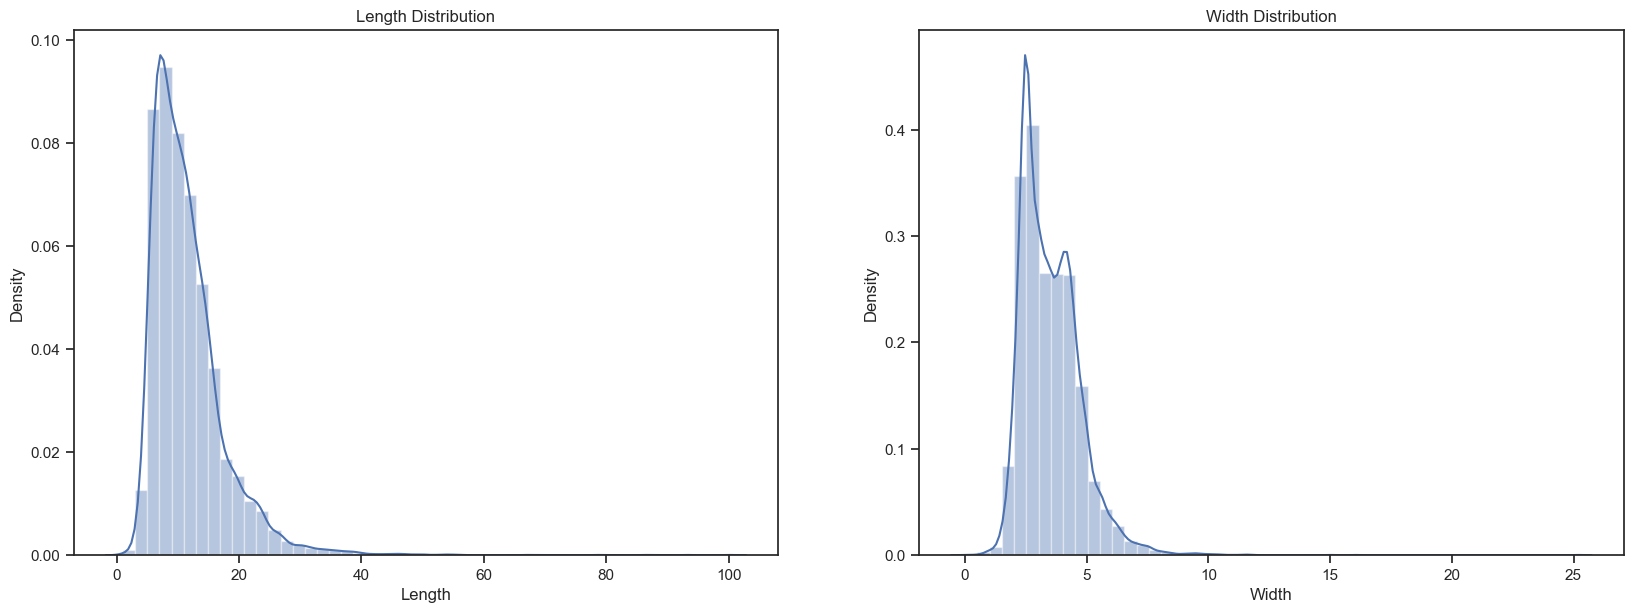

In [70]:
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.distplot(df_Structuring.Length)
ax1.set_title("Length Distribution")
ax2 = fig.add_subplot(224)
sns.distplot(df_Structuring.Width)
ax2.set_title("Width Distribution")

plt.savefig("length and Width Distribution")

In [16]:
#Filling missing values

df_Structuring['Width'].fillna(df_Structuring['Width'].median(),inplace=True)
df_Structuring['Length'].fillna(df_Structuring['Length'].median(),inplace=True)

In [17]:
# filling Null values in "Material" Column with most frequent value present in the column

df_Structuring['Material'].fillna(df_Structuring['Material'].value_counts().idxmax(),inplace=True)

In [18]:
#check for number of duplicate rows

df_Structuring.duplicated().sum()

0

In [19]:
#Removing missing values in the 'Manufacturer' or 'Country' column

df_Cleaning  = df_Structuring.dropna(subset=['Manufacturer','Country'])

In [20]:
#filling missing values in the 'Manufacturer', 'Country', and 'City' columns with the value 'None'

df_Structuring['Manufacturer'].fillna('None',inplace=True)
df_Structuring['Country'].fillna('None',inplace=True)
df_Structuring['City'].fillna('None',inplace=True)
df_Structuring.isna().sum()

Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR_price                      0
Country                        0
City                           0
dtype: int64

In [21]:
df_Cleaning['City'].fillna('None',inplace=True)
df_Cleaning.isna().sum()

Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR_price                      0
Country                        0
City                           0
dtype: int64

In [22]:
#check number of rows and columns in each DataFrame before and after the cleaning process

print('Befor Clean :' ,df_Structuring.shape)
print('After Clean :' ,df_Cleaning.shape)

Befor Clean : (9888, 11)
After Clean : (8521, 11)


In [23]:
#Checking for Datatype

df_Cleaning.dtypes

Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
EUR_price                       object
Country                         object
City                            object
dtype: object

In [24]:
# Converting the 'EUR_price' column in the DataFrame df_Cleaning to a floating-point numeric data type, allowing for mathematical \n",
#operations and more precise numerical representation.

df_Cleaning['EUR_price'] = df['EUR_price'].astype(float)

,Boat Type,Number of views last 7 days
19,Cabin Boat,250.885077
20,House Boat,260.296296
21,Classic,288.800000
22,Water ski,316.777778
23,Wakeboard/Wakesurf,373.450000


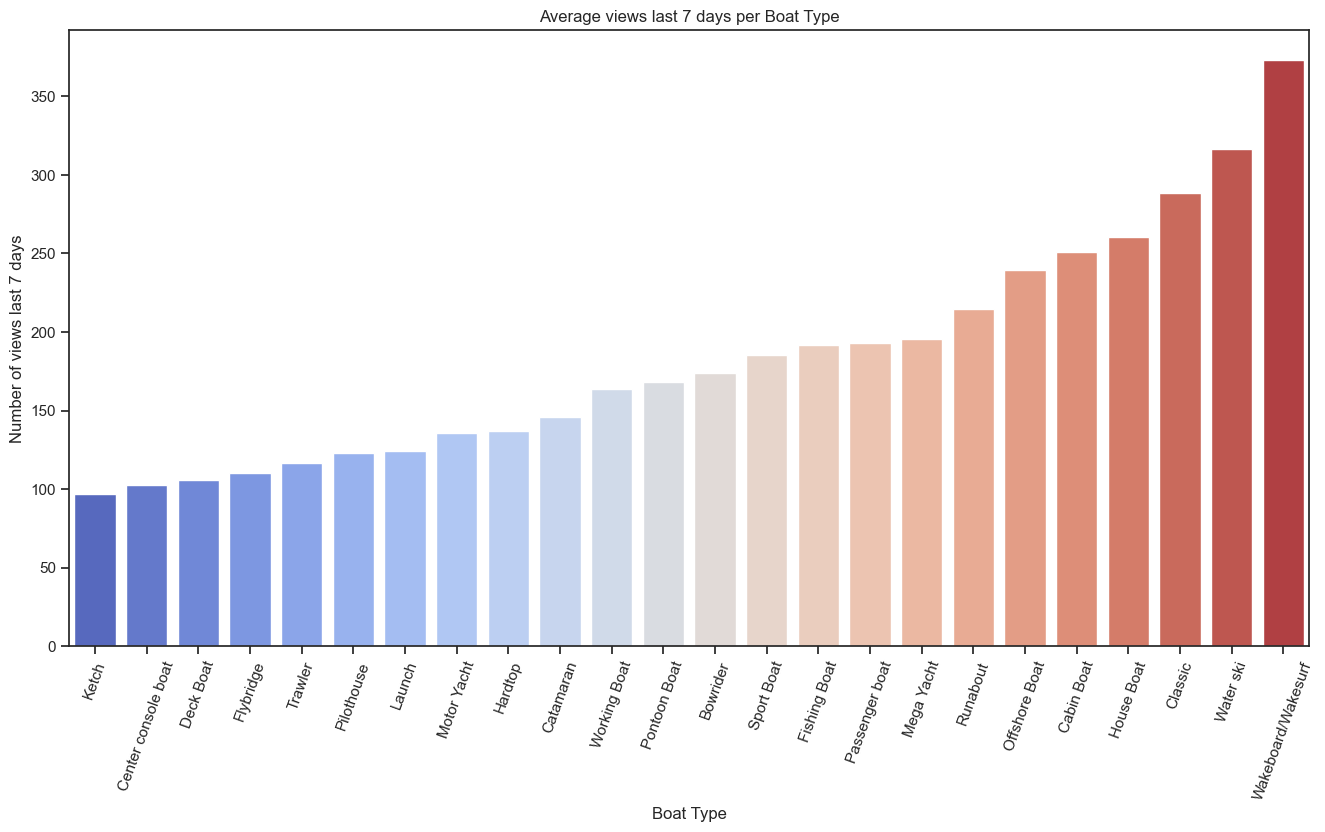

In [69]:
#Exploratory Data Analysis

#Does the type of boat have an impact on the number of views it receives?

fig = plt.figure(figsize=(16,8) )
Boat_Type_View= df_Cleaning.groupby('Boat Type')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Boat Type', y='Number of views last 7 days', data=Boat_Type_View,
                 palette="coolwarm")
plt.title("Average views last 7 days per Boat Type")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)
display(Boat_Type_View[-5:])
plt.savefig("Average views last 7 days per Boat Type")

Among the various boat types, Wakeboard/Wakesurf, Water ski, Classic, House Boat, and Cabin Boat exhibit the most substantial 
increase in average views. 
Particularly, Wakeboard/Wakesurf stands out with the highest average views compared to the rest.

An interesting observation emerges as people seem to gravitate towards boats associated with fun-filled activities and family
gatherings.

Step - 2 
Questions to explore -
1.	Do the most expensive boats receive the highest number of views? 
2.	What are the factors that influence the number of views a boat listing receives on the website?

To what extent does the choice of boat engine and whether the boat is used or new play a pivotal 
role in driving higher view counts?

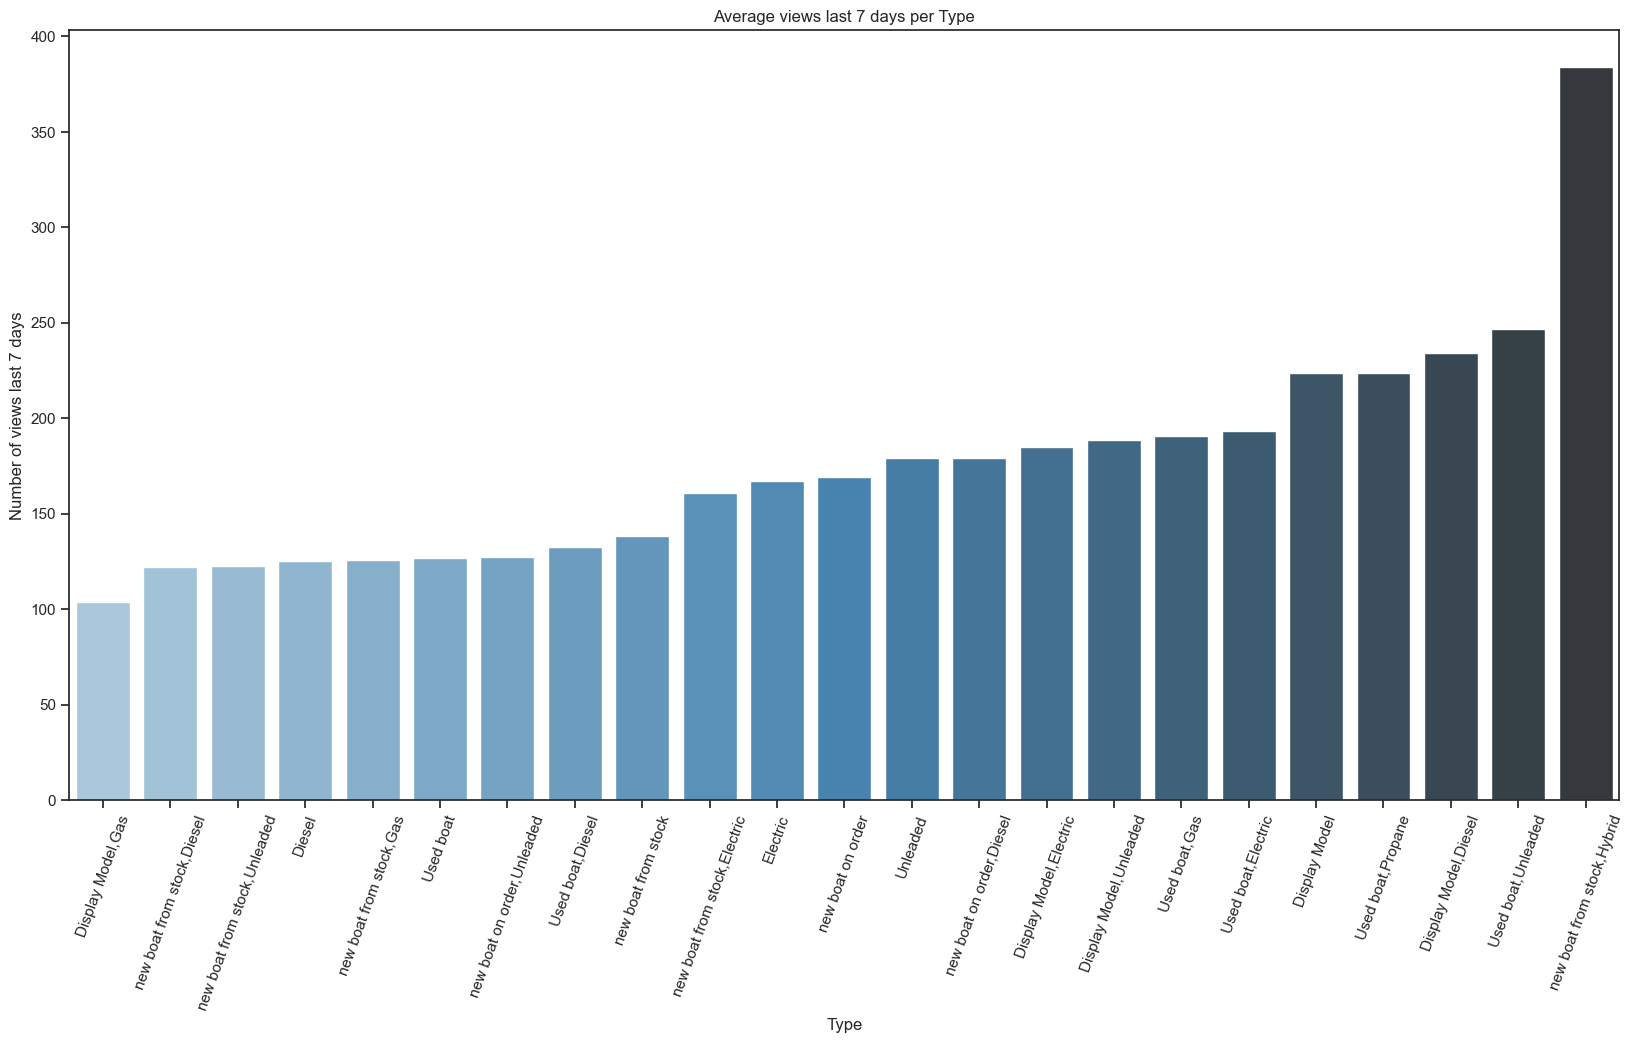

In [71]:
fig = plt.figure(figsize=(20,10) )
Type_View= df_Cleaning.groupby('Type')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Type', y='Number of views last 7 days', data=Type_View,
                 palette="Blues_d")
plt.title("Average views last 7 days per Type")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)

plt.savefig("Average views last 7 days per Type")

the above chart represents the boat type , engine type and number of views

In [28]:
# Create Engine Type Column

df_Cleaning['Engine Type'] = df_Cleaning['Type'].str.split(pat = ',', expand = True)[1]

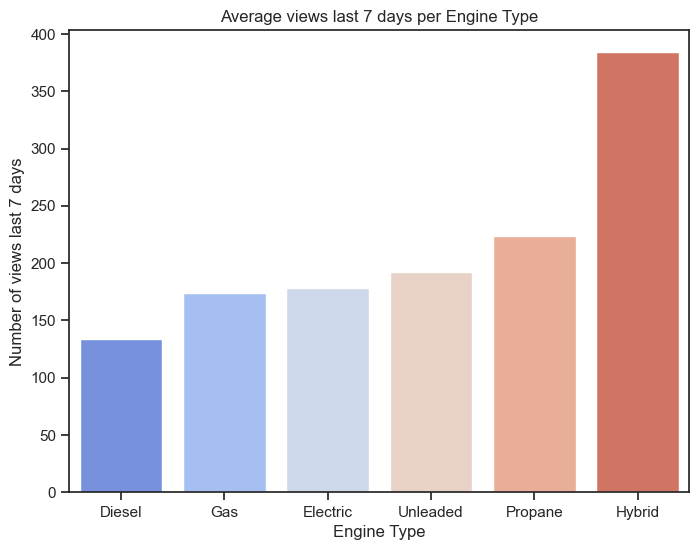

In [72]:
# Convert None to nan


df_Cleaning['Engine Type'] = df_Cleaning['Engine Type'].replace('None', np.nan)

fig = plt.figure(figsize=(8,6) )
Type_View= df_Cleaning.groupby('Engine Type')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Engine Type', y='Number of views last 7 days', data=Type_View,
                 palette="coolwarm")
plt.title("Average views last 7 days per Engine Type")

plt.savefig("Average views last 7 days per Engine Type")

The engine type that garners the highest average views is hybrid

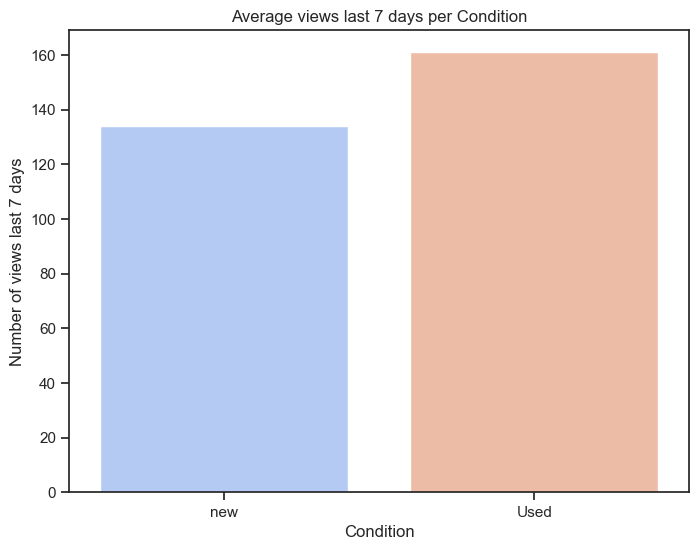

In [73]:
df_Cleaning['Condition'] = df_Cleaning['Type'].str.split(pat = ' ', expand = True)[0]

df_Cleaning['Condition'] = df_Cleaning['Condition'].replace({'Unleaded':np.nan, 0:np.nan})
df_Cleaning['Condition'] = df_Cleaning['Condition'].replace({'Diesel':np.nan, 0:np.nan})
df_Cleaning['Condition'] = df_Cleaning['Condition'].replace({'Electric':np.nan, 0:np.nan})

df_Cleaning.loc[df_Cleaning['Condition'] == 'Display', 'Condition'] = 'new'



fig = plt.figure(figsize=(8,6) )
Condition= df_Cleaning.groupby('Condition')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Condition', y='Number of views last 7 days', data=Condition,
                 palette="coolwarm")
plt.title("Average views last 7 days per Condition")

plt.savefig("Average views last 7 days per condition")

The engine type that garners the highest average views is hybrid. Notably, there isn't a significant disparity in average views between used and new boats.

Subsequently, we will explore whether this pattern varies across different countries.

Material

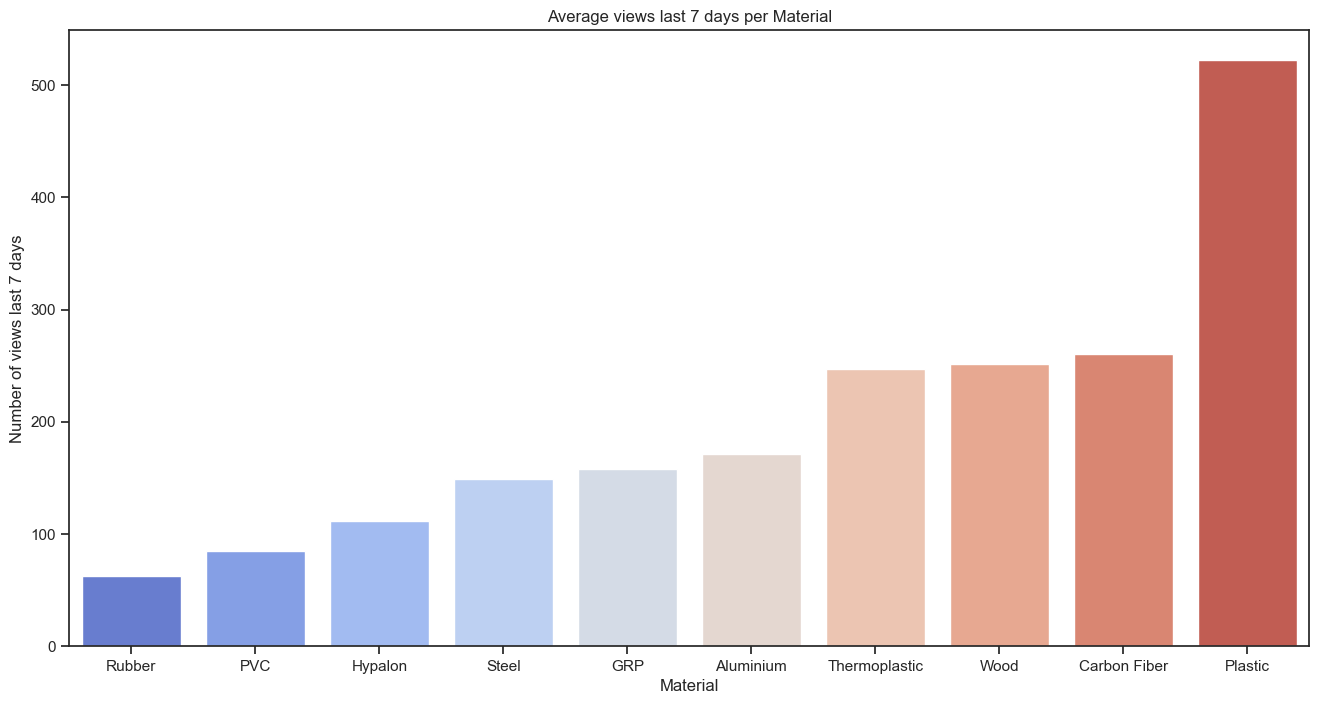

In [74]:
fig = plt.figure(figsize=(16,8) )
Material_View= df_Cleaning.groupby('Material')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)


sns.barplot(x='Material', y='Number of views last 7 days', data=Material_View,
                 palette="coolwarm")
plt.title("Average views last 7 days per Material")

plt.savefig("Average views last 7 days per material")

The material most commonly associated with recreational boats, plastic, unsurprisingly yields the highest average views. This aligns with expectations, given the widespread use of plastic in the construction of such boats.

The average difference in views between old and new boats is relatively small. Moving forward, we will investigate if this distinction varies across different countries.

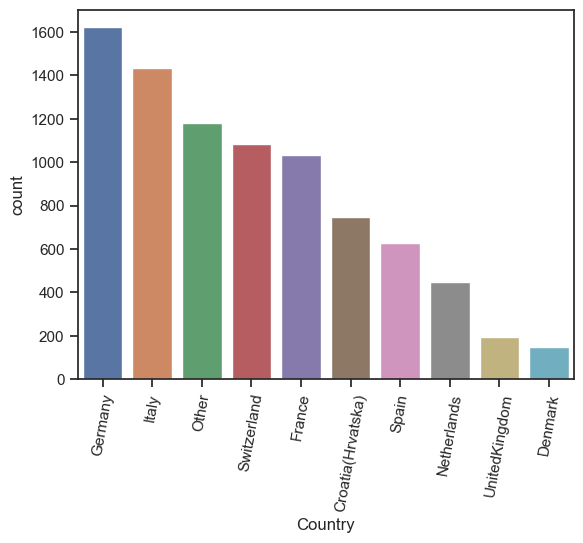

In [75]:
top10_country = df_Cleaning.Country.value_counts().iloc[:10].index

df_Cleaning.loc[~df_Cleaning['Country'].isin(top10_country),'Country']='Other'

ax = sns.countplot(x = 'Country', data = df_Cleaning, order = df_Cleaning.Country.value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)

plt.savefig("Top 10 countries")

In [34]:
df_Cleaning.Country.value_counts()[:10]
df_Cleaning.Country=df_Cleaning.Country.str.replace(' ','')
df_Cleaning.Country.value_counts()[:10]

Germany              1622
Italy                1434
Other                1180
Switzerland          1085
France               1031
Croatia(Hrvatska)     747
Spain                 629
Netherlands           450
UnitedKingdom         195
Denmark               148
Name: Country, dtype: int64

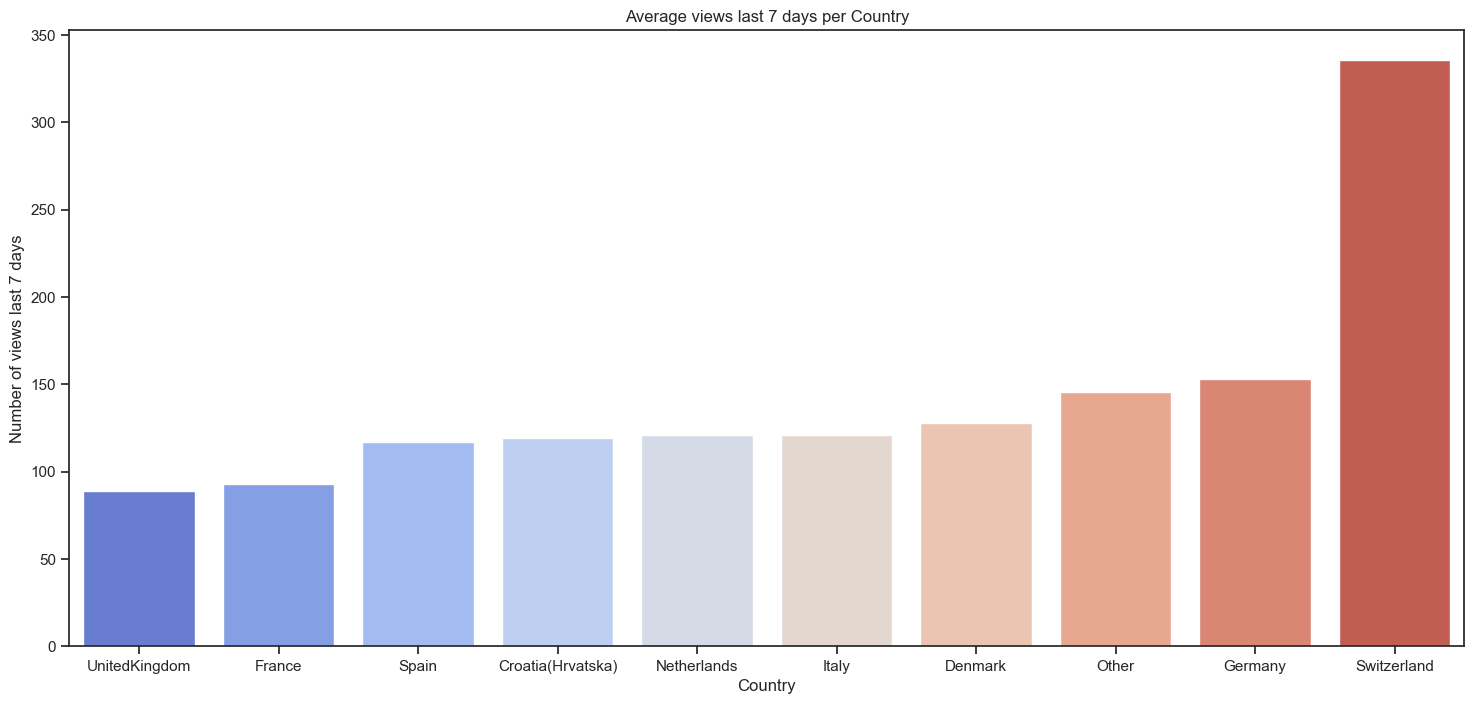

In [76]:
fig = plt.figure(figsize=(18,8) )
Country_View= df_Cleaning.groupby('Country')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Country', y='Number of views last 7 days', data=Country_View[-10:],
                 palette="coolwarm")
plt.title("Average views last 7 days per Country")

plt.savefig("Average views last 7 days per country")

Switzerland and Germany stand out with notably high numbers of views.

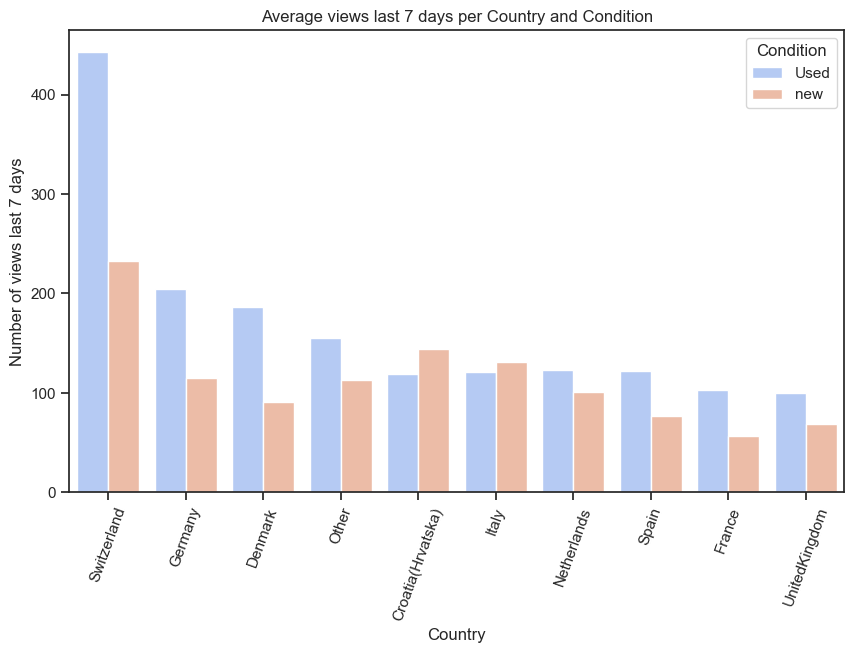

In [77]:
fig = plt.figure(figsize=(10,6) )
Country_View= df_Cleaning.groupby(['Country','Condition'])['Number of views last 7 days'].mean().reset_index(drop=False).sort_values(by=['Number of views last 7 days','Country'],ascending=False)
sns.barplot(x='Country', y='Number of views last 7 days',hue='Condition', data=Country_View,
                 palette="coolwarm")
plt.title("Average views last 7 days per Country and Condition")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)

plt.savefig("Average views last 7 days per country and condition")

The difference in average views between used and new boats is relatively small.


In [37]:
#Number of views per Country&Boat Type


Country_View= df_Cleaning.groupby(['Country','Boat Type'])['Number of views last 7 days'].mean().reset_index(drop=False).sort_values(by=['Country','Number of views last 7 days'],ascending=False)
Country_ViewNew=Country_View[Country_View['Country']=='Null']

for e in Country_View['Country'].unique() : 
    Country_ViewNew=Country_ViewNew.append(Country_View[Country_View['Country']==e].head(2))

House Boat            3
Mega Yacht            3
Wakeboard/Wakesurf    3
Classic               3
Offshore Boat         2
Passenger boat        1
Water ski             1
Bowrider              1
Hardtop               1
Trawler               1
Cabin Boat            1
Name: Boat Type, dtype: int64

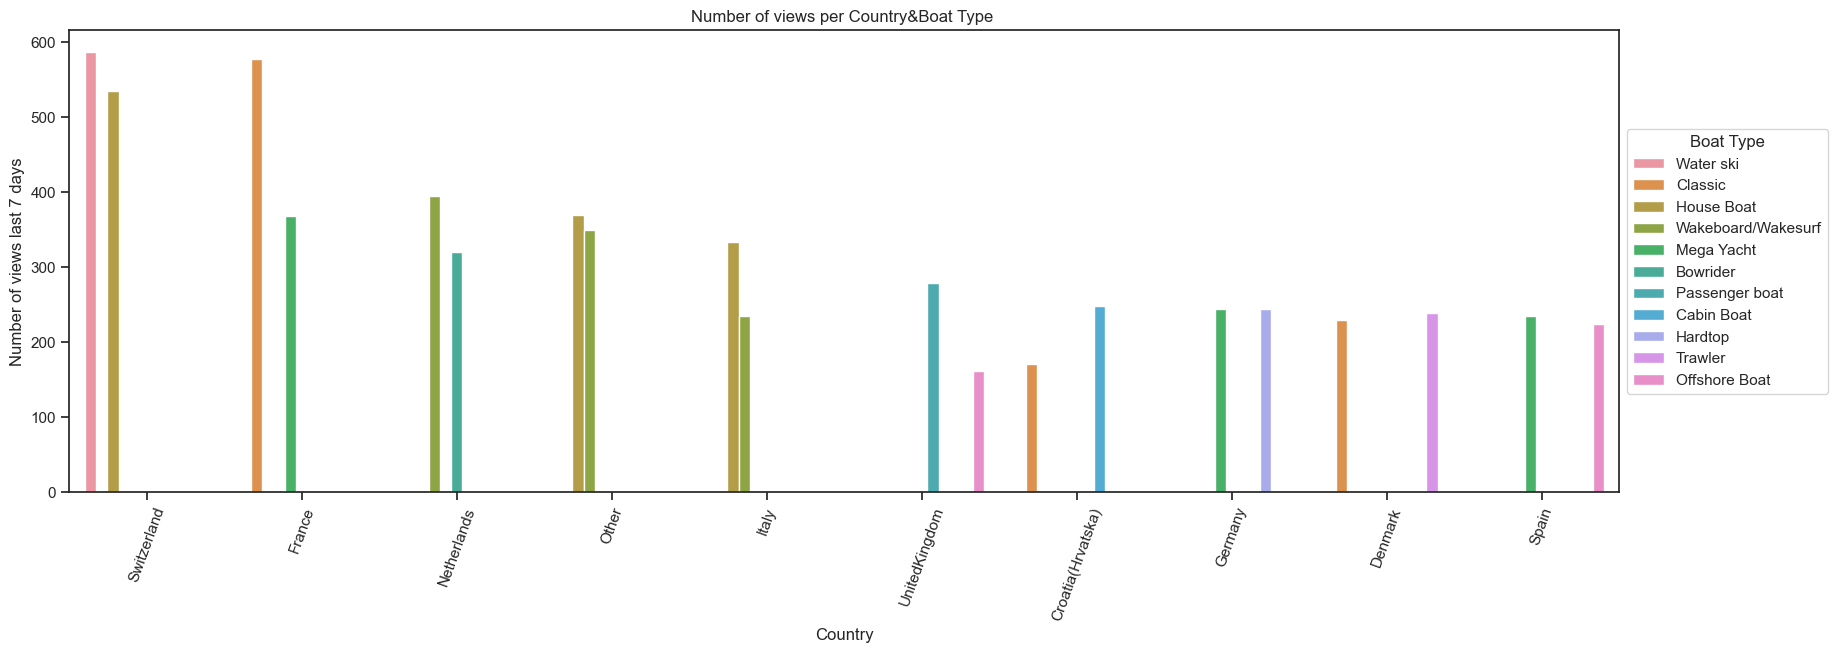

In [78]:
display(Country_ViewNew['Boat Type'].value_counts())
fig = plt.figure(figsize=(20,6) )

sns.barplot(x='Country', y='Number of views last 7 days',hue='Boat Type', data=Country_ViewNew.sort_values(by=['Number of views last 7 days'],ascending=False),
                ci=False)
plt.title("Number of views per Country&Boat Type ")
plt.xticks(rotation=70)
plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5), title = 'Boat Type')

plt.savefig("number of views per country and boat Type")

Countries exhibit varying preferences for different types of boats; however, there is a consensus among several countries, including House Boat, Mega Yacht, Wakeboard/Wakesurf, Classic, and Offshore Boat.

Notably, in Croatia and Italy, the demand for new boats surpasses that of used boats.

Number of views per Country&Engine Type

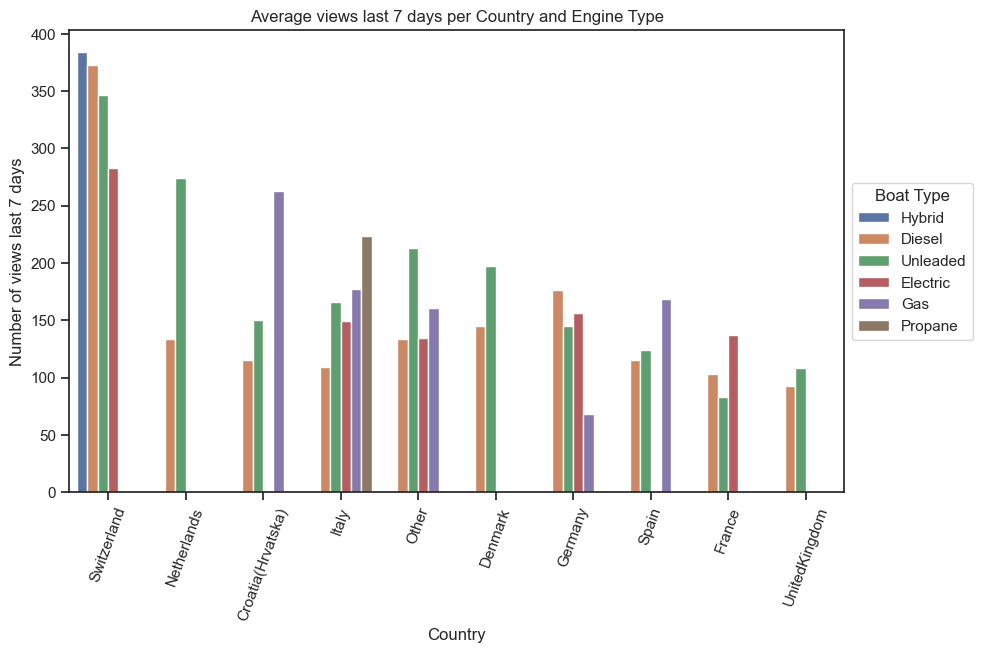

In [79]:
fig = plt.figure(figsize=(10,6) )
Country_View= df_Cleaning.groupby(['Country','Engine Type'])['Number of views last 7 days'].mean().reset_index(drop=False).sort_values(by=['Number of views last 7 days','Country'],ascending=False)
sns.barplot(x='Country', y='Number of views last 7 days',hue='Engine Type', data=Country_View)
plt.title("Average views last 7 days per Country and Engine Type")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)
plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5), title = 'Boat Type')

plt.savefig("Average views last 7 days per country and engine Type")

Unleaded engine and Diesel are favored by the majority of countries. However, the primary preferences diverge across nations as outlined below:

Switzerland exhibits a preference for Hybrid engines.
Croatia and Spain show a demand for Gas engines.
Italy leans towards Propane engines.
France expresses a preference for Electric engines.

Number of views per Country&Material

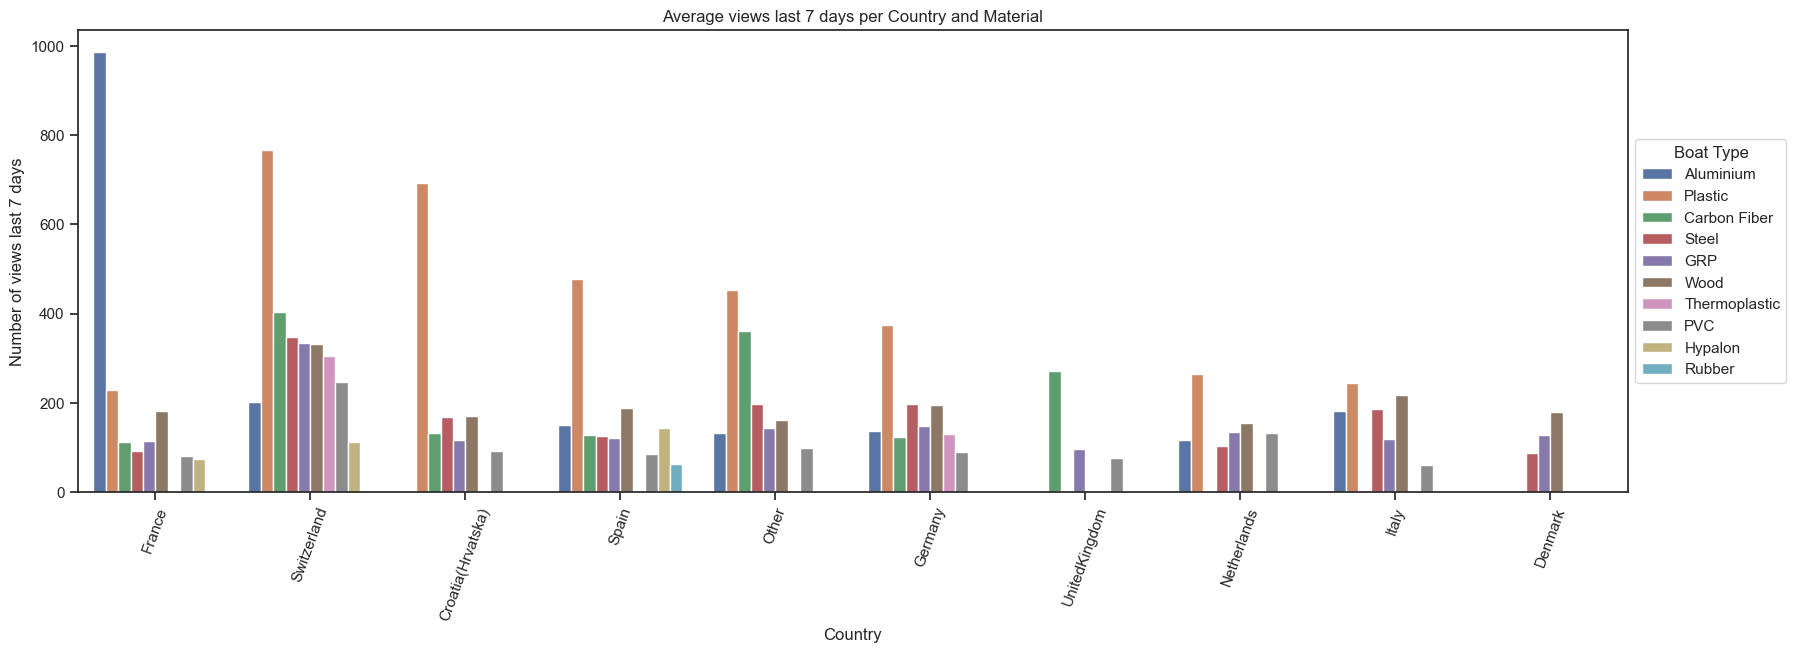

In [80]:
fig = plt.figure(figsize=(20,6) )
Country_View= df_Cleaning.groupby(['Country','Material'])['Number of views last 7 days'].mean().reset_index(drop=False).sort_values(by=['Number of views last 7 days','Country'],ascending=False)
sns.barplot(x='Country', y='Number of views last 7 days',hue='Material', data=Country_View)
plt.title("Average views last 7 days per Country and Material")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)
plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5), title = 'Boat Type')

plt.savefig("Average views last 7 days per country and material")

Switzerland boasts the highest average views among the countries.

The distinction in average views between used and new boats is relatively small.

In Switzerland and Germany, there is a substantial surge in demand for used boats.

Conversely, in Croatia and Italy, the demand for new boats surpasses that for used boats.

Furthermore, the prevalent boat preference across all countries is for Plastic boats, with the exception of France, which demonstrates a demand for Aluminium boats.

In [41]:
df_Cleaning.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City,Engine Type,Condition
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,GRP,226,3403.74,Switzerland,Lake Geneva,None,new
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany,Bnningstedt,None,new
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,3845.40,Switzerland,Lake of Zurich,None,new
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,GRP,64,3367.00,Denmark,Svendborg,None,new
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.00,Germany,Bayern,None,new


Step - 3 Create a correlation matrix heatmap (colored).
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

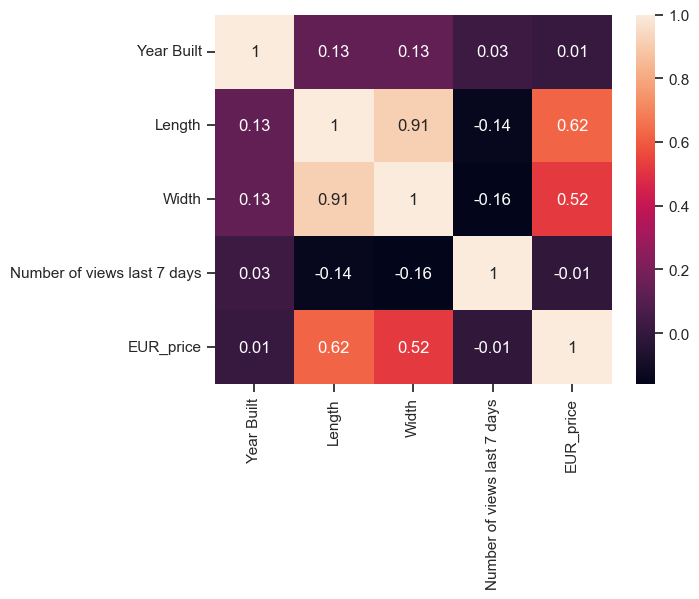

<Figure size 640x480 with 0 Axes>

In [81]:
corr = df_Cleaning.corr().round(2)
sns.heatmap(corr, annot=True)
plt.show()

plt.savefig("Heat map")

Step - 4 Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
Discuss the output in a markdown cell.

Number of views per Year Built

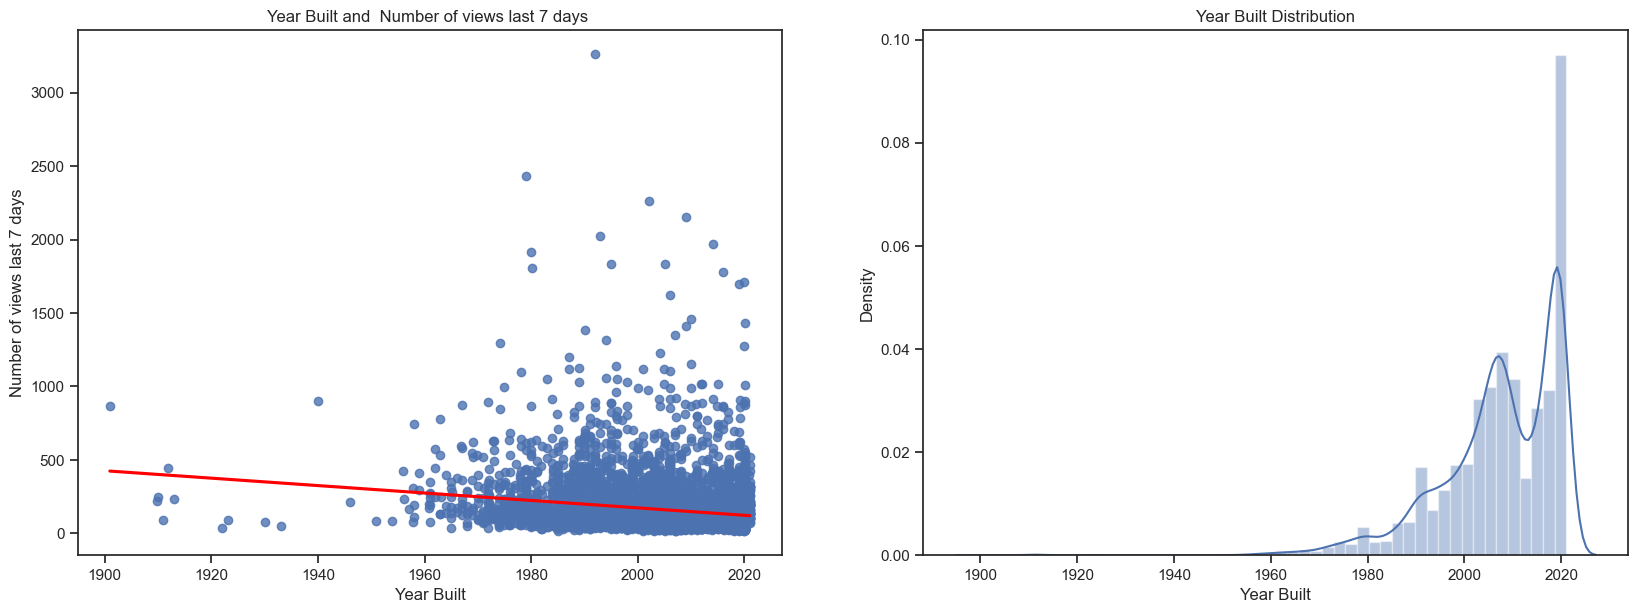

In [82]:
df_CleaningTest=df_Cleaning[df_Cleaning['Year Built']>0]

fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.regplot(x='Year Built', y='Number of views last 7 days', data=df_CleaningTest, line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax1.set_title("Year Built and  Number of views last 7 days ")
ax2 = fig.add_subplot(224)
sns.distplot(df_CleaningTest['Year Built'])
ax2.set_title("Year Built Distribution")

plt.savefig("Year built and number of views last 7 days")

The observed trend where an increase in the boat's years of built corresponds to an increase in the number of views in the last 7 days implies a positive correlation between these two variables. 

In [44]:
display(df_Cleaning['Year Built'].quantile([0.25, 0.50, 0.75]))
df_Cleaning['Year Built'].max()

0.25    1999.0
0.50    2008.0
0.75    2018.0
Name: Year Built, dtype: float64

2021

In [45]:
df_Cleaning['age_group']  = pd.cut(df_Cleaning['Year Built'], bins = [0,2000,2018, 2022], labels = ['Very Old (built before 2000)', 'Old (built between 2000-2017)','Modern (built after 2018)'])
df_Cleaning['age_group'].value_counts()

Old (built between 2000-2017)    4254
Very Old (built before 2000)     1901
Modern (built after 2018)        1867
Name: age_group, dtype: int64

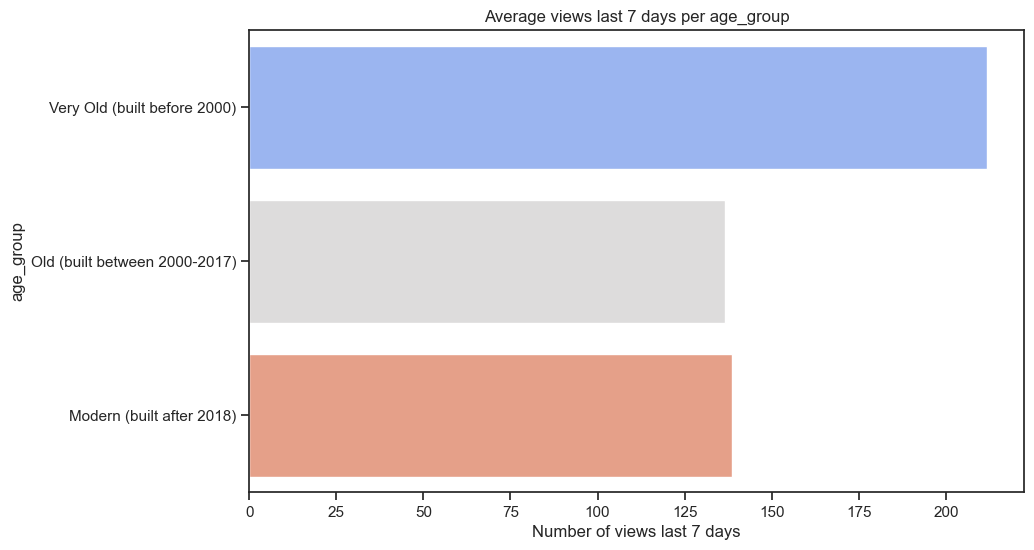

In [83]:
fig = plt.figure(figsize=(10,6) )
age_group= df_Cleaning.groupby('age_group')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(y='age_group', x='Number of views last 7 days', data=age_group,
                 palette="coolwarm")
plt.title("Average views last 7 days per age_group")

plt.savefig("Average views last 7 days per age group")

Boats classified as "Very Old" (constructed before 2000) exhibit the highest average number of views. This observation suggests a potentially intriguing trend where older boats garner more attention in terms of views

Step - 5 Create a pair plot of the entire data set,Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

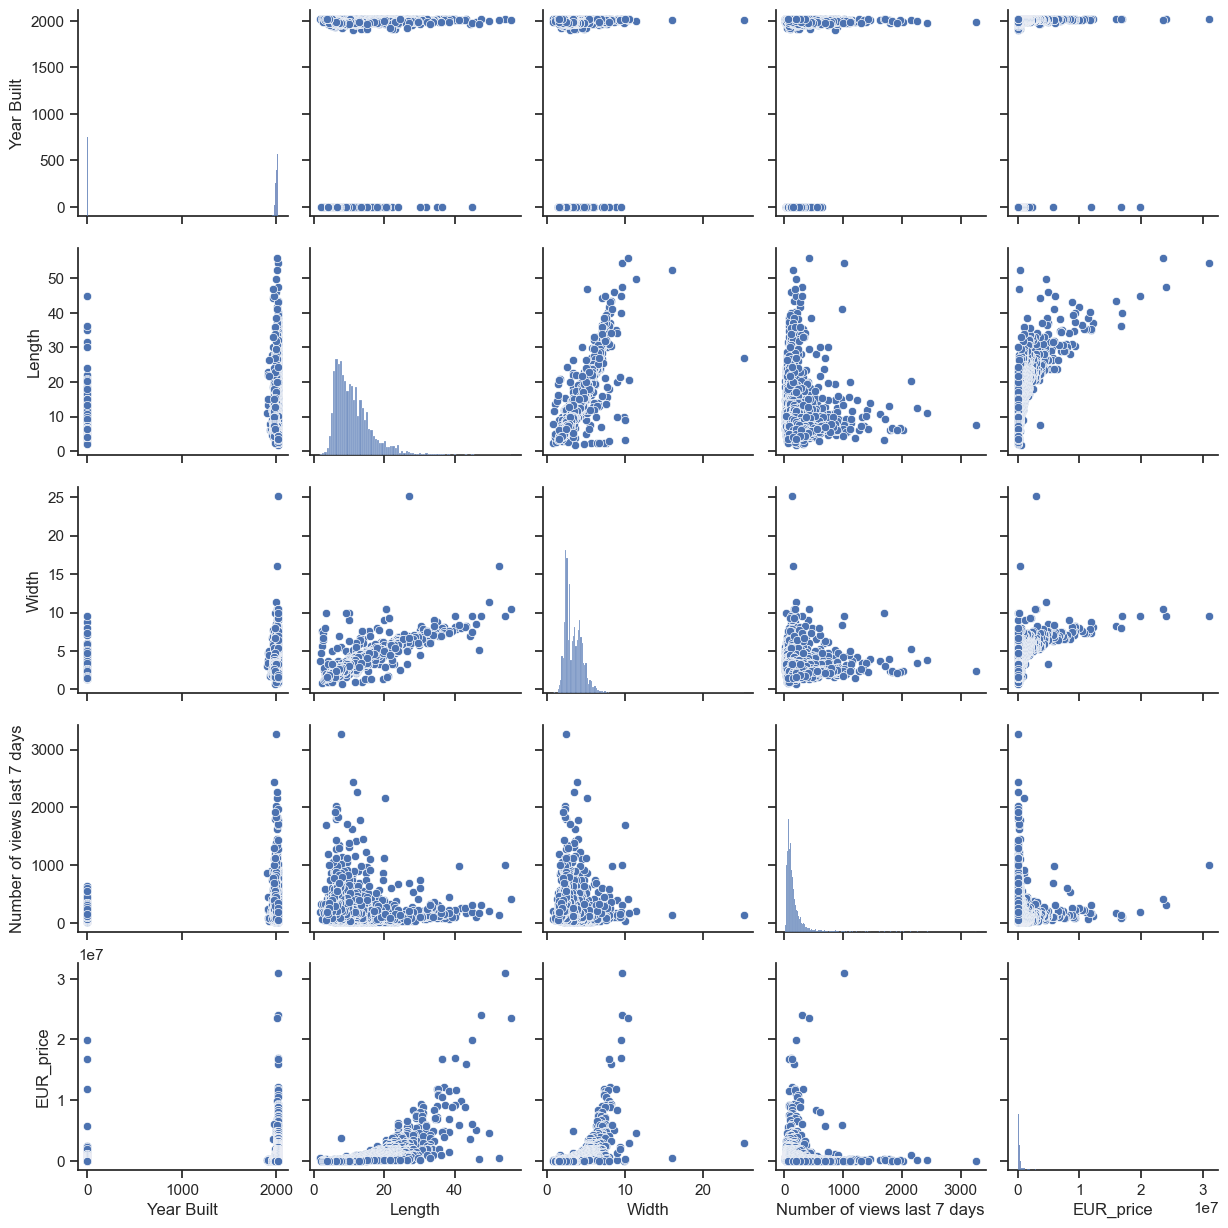

In [84]:
sns.pairplot(df_Cleaning)

plt.savefig("pair plot of entire data set")

pairplot of entire data set

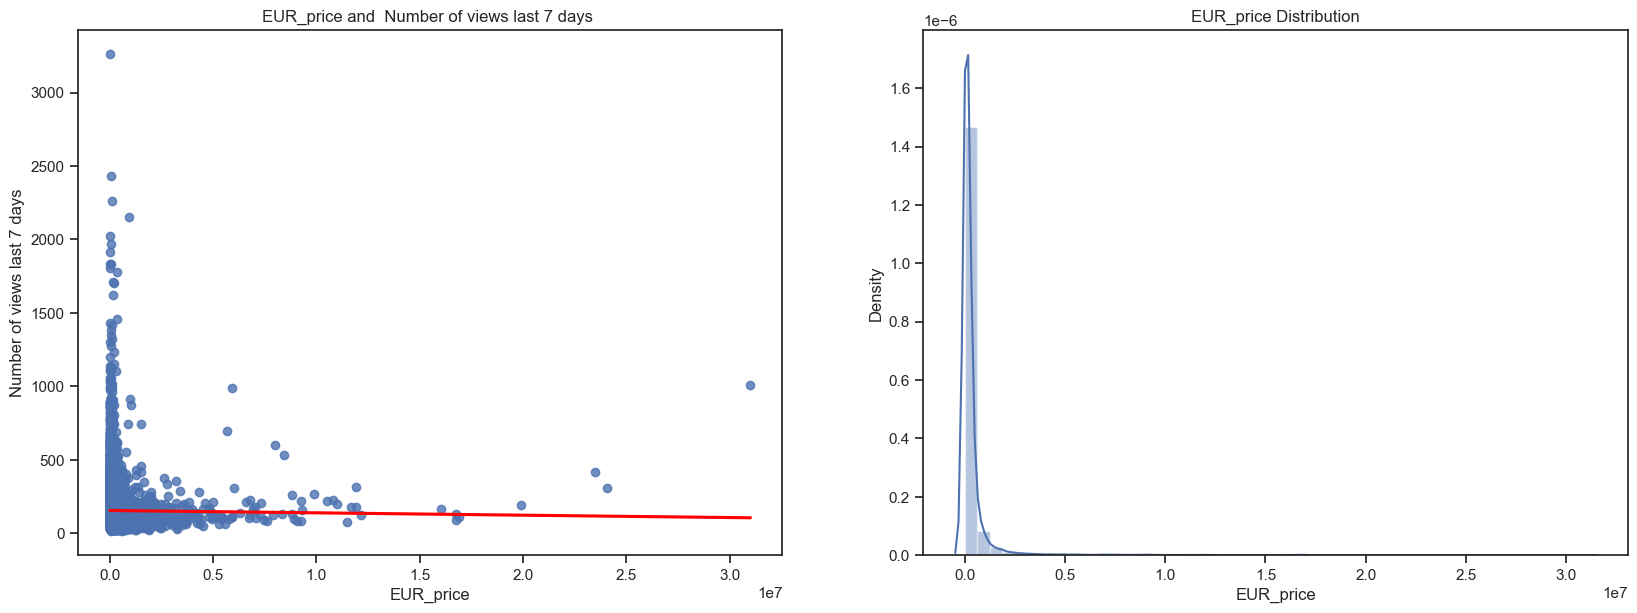

In [85]:
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.regplot(x='EUR_price', y='Number of views last 7 days', data=df_Cleaning, line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax1.set_title("EUR_price and  Number of views last 7 days ")
ax2 = fig.add_subplot(224)
sns.distplot(df_Cleaning['EUR_price'])
ax2.set_title("EUR_price Distribution")

plt.savefig("Eur_Price and number of views last 7 days")

As boat prices rise, the number of views tends to decline, indicating an negative correlation between the two factors. 

In [48]:
display(df_Cleaning['EUR_price'].quantile([0.25, 0.50, 0.75]))
df_Cleaning['EUR_price'].max()

0.25     44290.0
0.50     95000.0
0.75    250000.0
Name: EUR_price, dtype: float64

31000000.0

In [49]:
df_Cleaning['Price_groub']= pd.cut(df_Cleaning['EUR_price'], bins = [0,44290.0,95000.0,31000000.0], labels = ['Cheap (less than 44290)', 'Medium (44290-250000)','Expensive (more than 250000)'])
df_Cleaning['Price_groub'].value_counts()
df_Cleaning['Price_groub'].isna().sum()

0

step - 6 Create a categorical plot and interpret the results.


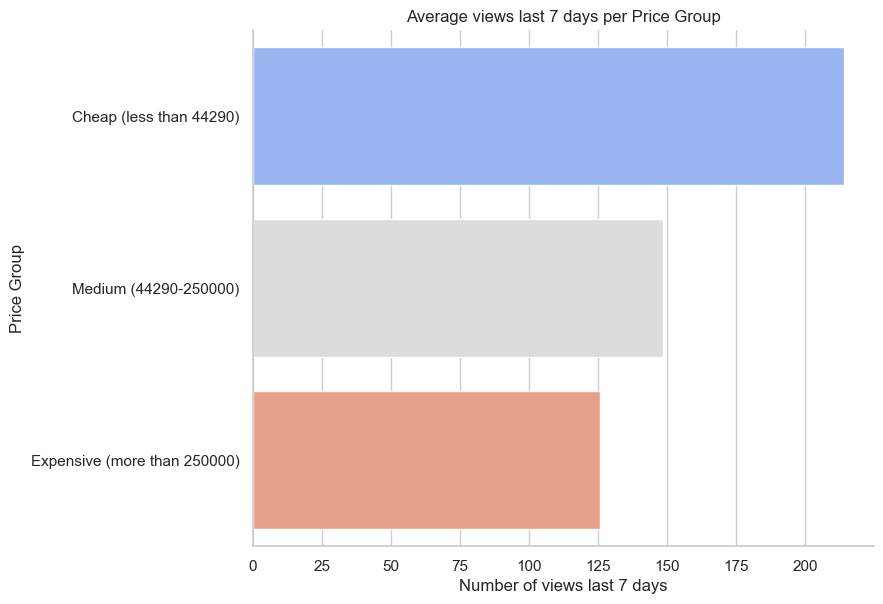

<Figure size 640x480 with 0 Axes>

In [86]:
sns.set(style="whitegrid")

Price_groub = df_Cleaning.groupby('Price_groub')['Number of views last 7 days'].mean().reset_index(drop=False)

sns.catplot(y='Price_groub', x='Number of views last 7 days', data=Price_groub,
            kind='bar', palette="coolwarm", height=6, aspect=1.5)
plt.title("Average views last 7 days per Price Group")
plt.xlabel("Number of views last 7 days")
plt.ylabel("Price Group")

plt.show()

plt.savefig("Average views last 7 days per price group")

Boats categorized as "Cheap" (priced at less than 44290) demonstrate the highest average number of views. This observation implies a notable trend where boats with lower price points tend to attract more views.

Number of views last 7 days

In [58]:
df_Cleaning['Views Performance']= pd.cut(df_Cleaning['Number of views last 7 days'], bins = [0,70,170,3263], labels = ['Low (less than 70)', 'Average (70-170)','Good (more than 170)'])
df_Cleaning['Views Performance'].value_counts()

Average (70-170)        4147
Good (more than 170)    2264
Low (less than 70)      2110
Name: Views Performance, dtype: int64

Number of views VS Length & Width

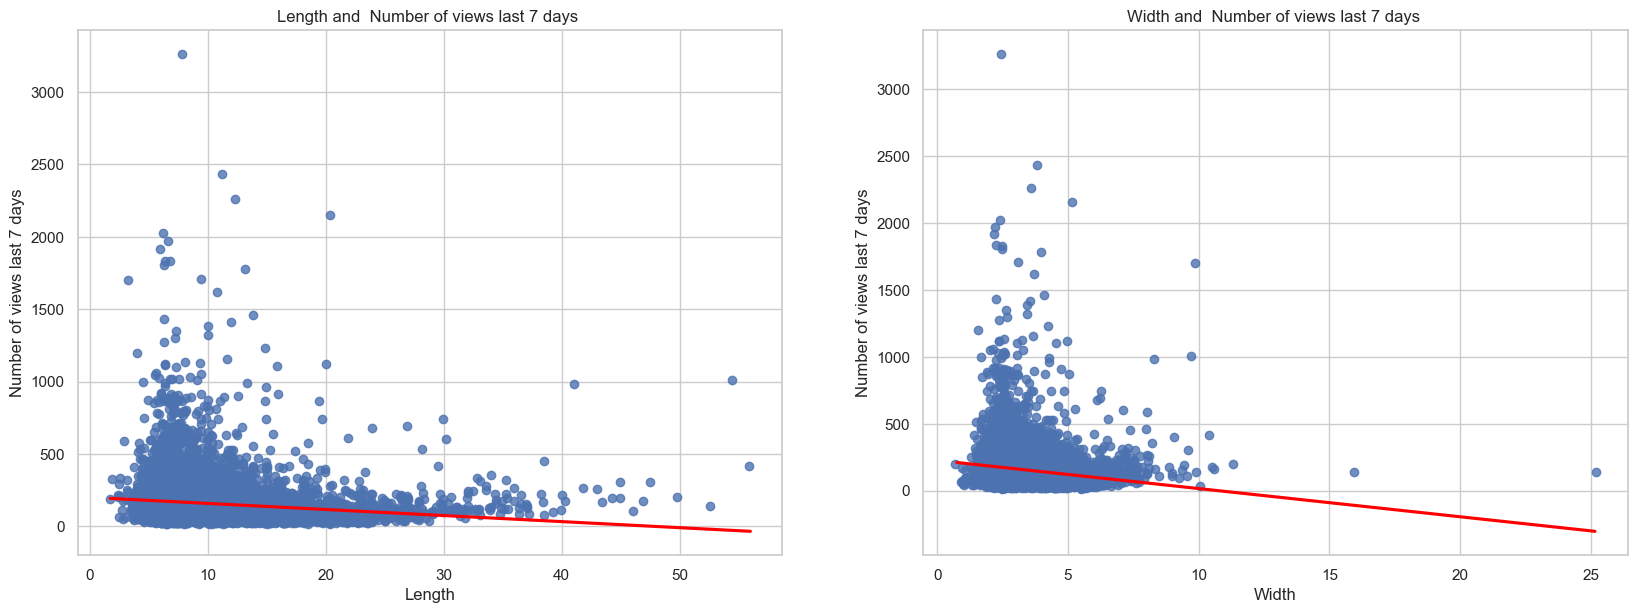

In [87]:
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.regplot(x='Length', y='Number of views last 7 days', data=df_Cleaning, line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax1.set_title("Length and  Number of views last 7 days ")
ax2 = fig.add_subplot(224)
sns.regplot(x='Width', y='Number of views last 7 days', data=df_Cleaning, line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax2.set_title("Width and  Number of views last 7 days ")

plt.savefig("length , width vs Average views last 7 days")

If we take a look at the above scatterplot it seems like the shorter the length of the boat is the more views it got, which is quite intuitive since smaller boats tend to be cheaper. Same story with the width as well(As they are obviously possitively correlated.)


In [88]:
file_path = (r'C:\Users\ranji\Downloads\Submitted tasks\Sourcing Open Data_7\Execrise 2\Cleaned_data.csv')

df_Cleaning.to_csv(file_path, index=False)

Step - 7 Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.


1.	Do the most expensive boats receive the highest number of views? 

Initially, I formulated a hypothesis: Do higher-priced boats garner the highest number of views? However, upon analysis, the findings revealed intriguing patterns:

Boats categorized as "Very Old" (constructed before 2000) exhibit the highest average views.
Additionally, boats classified as "Cheap" (priced at less than 44290) also demonstrate the highest average views.
These findings deviate from the initial assumption, suggesting that factors such as age and affordability play significant roles in influencing viewer engagement.



2.	What are the factors that influence the number of views a boat listing receives on the website?

Factors influencing boat listing views:

Material Preference: Plastic-built boats attract the highest average views, indicating a material-driven viewer interest.

Engine Choice: Unleaded and Diesel engines are favored by most countries, suggesting that engine type significantly impacts listing views.


Step - 8 Define any hypotheses that you can at this point. You’ll be testing these later on.

Characteristics of the most viewed boat listings in the last 7 days?